# Machine Learning Master Notes 4 - Simple Linear Regression and Cost Function

## Simple Linear Regression (One Feature, Intercept-b is 0)

### Prepare Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression - Difference Between Prediction and Actual (Simple 3 Points Example)

Let us continue with the 3 points example from the previous note.

In [2]:
x = np.array([100,200,300])
y = np.array([100,200,300])

In [3]:
def compute_prediction_line_simple(x,w):
    m = len(x)
    f = np.zeros(m)
    for i in range(m):
        f[i] = (x[i] * w) 
        
    return f

Assuming we predict $w=2$, then the differences / errors can be depicted as follows:

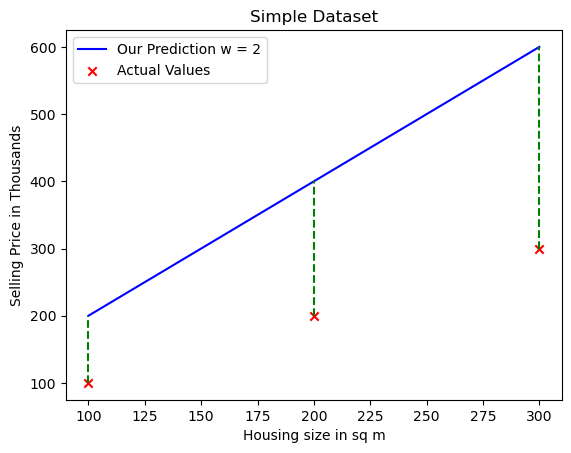

In [4]:
w=2
y_pre_w2 = compute_prediction_line_simple(x,w)

fig = plt.figure()
# Plot our model prediction
plt.plot(x, y_pre_w2, c='b',label='Our Prediction w = 2')

for i in range(len(x)):
    p1 = [x[i],y[i]]
    p2 = [x[i],y_pre_w2[i]]
    plt.plot(p1, p2, 'g--')
# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Simple Dataset")
# Set the y-axis label
plt.ylabel('Selling Price in Thousands')
# Set the x-axis label
plt.xlabel('Housing size in sq m')
plt.legend()
plt.show()

## Ordinary Least Squares (OLS) in Regression Analysis

The following section is a quick revision on Regression Analysis in Statistics. In the field of Statistics, we use regression analysis to analyze the tends between the features and the outcome. Using the example above, we need to find a line that fits the data. In order to achieve that, we need to have metrics to measure the difference between the prediction and actual data.

In Statistics, there are two metrics that are commonly used. They are **Residual Sum of Square (RSS)** and **Root Mean Square Error (RMSE)**. Both metrics has its pros and cons in its application. However, the details is beyond our current scope.

In **Residual Sum of Square (RSS)**, the formula is describe below:

$$RSS =  \sum\limits_{i=0}^{m-1} (\hat{y}^{(i)}-y^{(i)})^{2}$$


In Statistics, one of the main technique to find the best fit line is to used a technique called **Ordinary Least Squares (OLS)** method. **OLS** is a statistical technique used for estimating the parameters of a linear regression model. The **main objective is to minimize the error metrics** such as **RSS** or **RMSE**.

To obtain the weights ($w$) and intercept ($b$) of the line, OLS uses the **normal equation** below:

$$X^{T}X\beta = X^{T}y$$

where $\beta$ is the weights ($w$) and intercept ($b$)

$$\beta = (X^{T}X)^{-1}X^{T}y$$

In machine learning, besides using a normal equation to find the best fit line, we also introduce other technique such as **Gradient Descent** that has more applications to other machine learning model. The objective of minimizing the errors remains the same.

## Loss Function

Base on the plot above, we can compute the error of each of our predicted line using the formula:

$$Error = predicted(y) - actual(y)$$

For each data point:

$$\text{Error for One Point} = \text{Loss Function} = predicted (y) - actual (y)$$

We also call the error for each data point a **Loss Function**. 

We improve the formula by squaring the differences. Thus,

$$LossFunction =  (\hat{y}^{(i)}-y^{(i)})^{2}$$

The Loss Function is a way to compute the difference between the prediction and the actual data point. Please note that Loss Function refers to the computation of prediction error for **one training example**.

<div class="alert alert-info"> 

### Loss Function 

**Please note that there are many literature on different ways to compute Loss Function. Square error is one of the common ones. But it is not the only one.**

</div>

## Cost Function

To sum up all the errors, the formula can be presented as follows:

$$\text{Sum Of Error Of Every Point} =  \sum\limits_{i=0}^{m-1} (\hat{y}^{(i)}-y^{(i)})^{2}$$

We also name the sum of errors as the total cost of our prediction, hence, we called it **Cost Function**. 

Cost function is also denoted as $cost = J(w)$

Please note that the formula above is also know as **Residual Sum of Square (RSS)**.

$$ResidualSumOfSqaure = RSS =  \sum\limits_{i=0}^{m-1} (\hat{y}^{(i)}-y^{(i)})^{2}$$

>Note, some machine learning lecture stop at RSS for computing cost.



We improve the formula by averaging the sum of square with the numbers of our data point, this is to make our errors easier to handle:


$$Cost = J(w) = \frac{1}{m}   \sum\limits_{i=0}^{m-1} (\hat{y}^{(i)}-y^{(i)})^{2}$$

Instead of averaging the sum of error by m, instead we average the sum of error by 2m. There is a computational purpose when we explain the machine learning alogorithm later.

Since $f(x) = \hat{y} = wx $

The final formula:

$$J(w) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} ((wx^{(i)})-y^{(i)})^{2}$$

**So our main objective is to minimizing the cost function.**

## Computing Cost Function (Simple 3 Points Example)

In [5]:
def cost_function(actual_y,predicted_y):
    m = len(actual_y)
    rss = (actual_y - predicted_y)**2
    cost = rss.sum() / (2 * m)
    return cost
    

In [6]:
y

array([100, 200, 300])

In [7]:
y_pre_w2

array([200., 400., 600.])

In [8]:
w2_cost = cost_function(y,y_pre_w2)
w2_cost

23333.333333333332

If w = 1, which is a perfect fit, the cost should be zero:

In [9]:
w=1
y_pre_w1 = compute_prediction_line_simple(x,w)
y_pre_w1

array([100., 200., 300.])

In [10]:
y

array([100, 200, 300])

In [11]:
w1_cost = cost_function(y,y_pre_w1)
w1_cost

0.0

We can improved the cost function with raw data x,y and w

In [12]:
def cost_function_simple(x,y,w):
    m = len(x)
    sumAll = 0
    for i in range(m):
        fx = ((w * x[i]) - y[i]) ** 2
        sumAll += fx
    return (1 / (2 * m)) * sumAll

Using previous x and y example, we can calculate multiple cost function of w from $w = 0$ to $w = 10$ as follows:

In [13]:
x = np.array([100,200,300])
y = np.array([100,200,300])

In [14]:
cost_list = []
for w in range(0,10):
    cost = cost_function_simple(x,y,w)
    cost_list += [cost]
cost_list    

[23333.333333333332,
 0.0,
 23333.333333333332,
 93333.33333333333,
 210000.0,
 373333.3333333333,
 583333.3333333333,
 840000.0,
 1143333.3333333333,
 1493333.3333333333]

In [15]:
for i in range(len(cost_list)):
    print(f"If w = {i}, then the cost is {cost_list[i]}.")

If w = 0, then the cost is 23333.333333333332.
If w = 1, then the cost is 0.0.
If w = 2, then the cost is 23333.333333333332.
If w = 3, then the cost is 93333.33333333333.
If w = 4, then the cost is 210000.0.
If w = 5, then the cost is 373333.3333333333.
If w = 6, then the cost is 583333.3333333333.
If w = 7, then the cost is 840000.0.
If w = 8, then the cost is 1143333.3333333333.
If w = 9, then the cost is 1493333.3333333333.


For the cost list above we know that $w = 1$ has 0 cost, however, we can computationally find the lowest cost using the following:

In [16]:
print(f"The lowest cost is {min(cost_list)} and the w is {cost_list.index(min(cost_list))}")

The lowest cost is 0.0 and the w is 1


## Relationship Between Cost Function and Weights (w) (Simple 3 Points Example)

If we plot the graph of the list of cost:

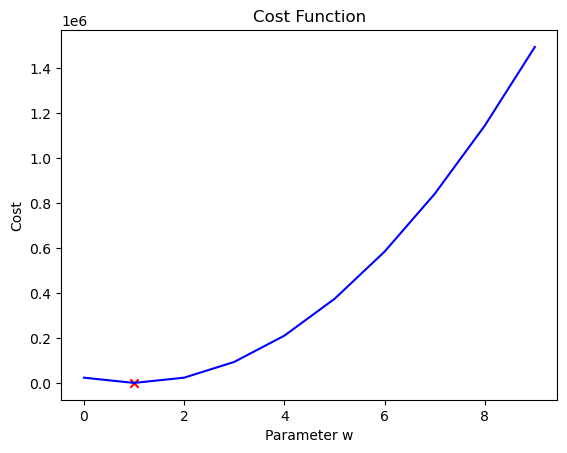

In [17]:
w = range(0,10)
fig11 = plt.figure()
plt.plot(w, cost_list, color='b')
plt.scatter(1, 0, marker='x', c='r')
plt.title("Cost Function")
plt.xlabel("Parameter w")
plt.ylabel("Cost")
plt.show()

## Linear Regression - Cost Function Analysis (Generic Example)

Let us consider a generic example to understand the cost curve in linear regression.

### Cost Function Summary

In summary, the cost function is depicted as follow:

Assumption: $$b = 0$$

Hypothesis: $$f_{w}(x^{(i)})=wx^{(i)}$$

Parameters:	$$w$$

Cost Function:	$$J(w) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{w}(x^{(i)})-y^{(i)})^{2}$$ 


similarly $$J(w) = \sum\limits_{i=0}^{m-1} ((wx^{(i)})-y^{(i)})^{2}$$

Goal: minimize $J(w)$


Using our knowledge above, we can plot a generic linear graph and graph of cost function as follows:

### Plotting Generic Linear Graph

If x and y is both from 0 to 10.

In [18]:
x = np.arange(0,10)
y = np.arange(0,10)

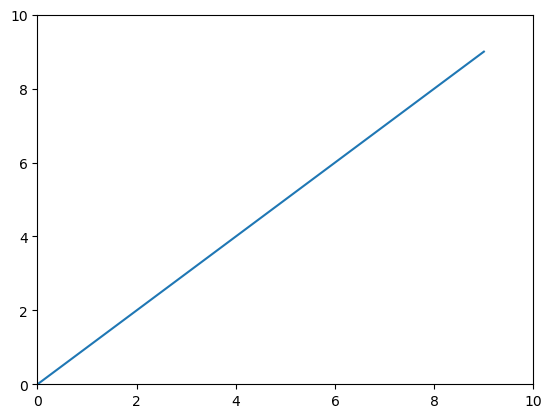

In [19]:
fig = plt.figure()
plt.plot(x, y)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

### Generic Graph: Simple Cost Function with Weights (w)

In [20]:
def cost_function_simple(x,y,w):
    m = len(x)
    sumAll = 0
    for i in range(m):
        fx = ((w * x[i]) - y[i]) ** 2
        sumAll += fx
    return (1 / (2 * m)) * sumAll

In [21]:
x = np.arange(1,10)
y = np.arange(1,10)
w = np.arange(-2,4,0.1)
costw = cost_function_simple(x,y,w)
costw

array([1.42500000e+02, 1.33158333e+02, 1.24133333e+02, 1.15425000e+02,
       1.07033333e+02, 9.89583333e+01, 9.12000000e+01, 8.37583333e+01,
       7.66333333e+01, 6.98250000e+01, 6.33333333e+01, 5.71583333e+01,
       5.13000000e+01, 4.57583333e+01, 4.05333333e+01, 3.56250000e+01,
       3.10333333e+01, 2.67583333e+01, 2.28000000e+01, 1.91583333e+01,
       1.58333333e+01, 1.28250000e+01, 1.01333333e+01, 7.75833333e+00,
       5.70000000e+00, 3.95833333e+00, 2.53333333e+00, 1.42500000e+00,
       6.33333333e-01, 1.58333333e-01, 1.14823087e-28, 1.58333333e-01,
       6.33333333e-01, 1.42500000e+00, 2.53333333e+00, 3.95833333e+00,
       5.70000000e+00, 7.75833333e+00, 1.01333333e+01, 1.28250000e+01,
       1.58333333e+01, 1.91583333e+01, 2.28000000e+01, 2.67583333e+01,
       3.10333333e+01, 3.56250000e+01, 4.05333333e+01, 4.57583333e+01,
       5.13000000e+01, 5.71583333e+01, 6.33333333e+01, 6.98250000e+01,
       7.66333333e+01, 8.37583333e+01, 9.12000000e+01, 9.89583333e+01,
      

In [22]:
print(f"The lowest cost is {costw.min()} and the w is {w[costw.argmin()]}")

The lowest cost is 1.1482308731550282e-28 and the w is 1.0000000000000027


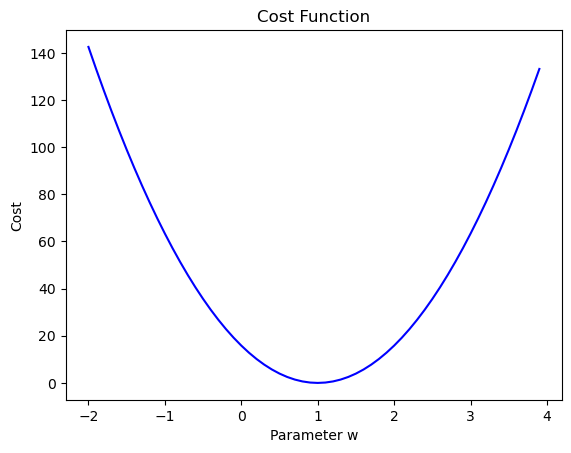

In [23]:
fig = plt.figure()
plt.plot(w, costw, color='b')
plt.title("Cost Function")
plt.xlabel("Parameter w")
plt.ylabel("Cost")
plt.show()

**As we can see, the a linear graph plot, the cost function graph is a U shaped plot.**



## Simple Cost Function without Intercept - (Prediction Line and Relative Position in Cost Function Graph)

We can also illustrate the learning parameters (w) prediction line and its relative position in the cost function graph. 

In [24]:
x = np.array([1,2,3])
y = np.array([1,2,3])

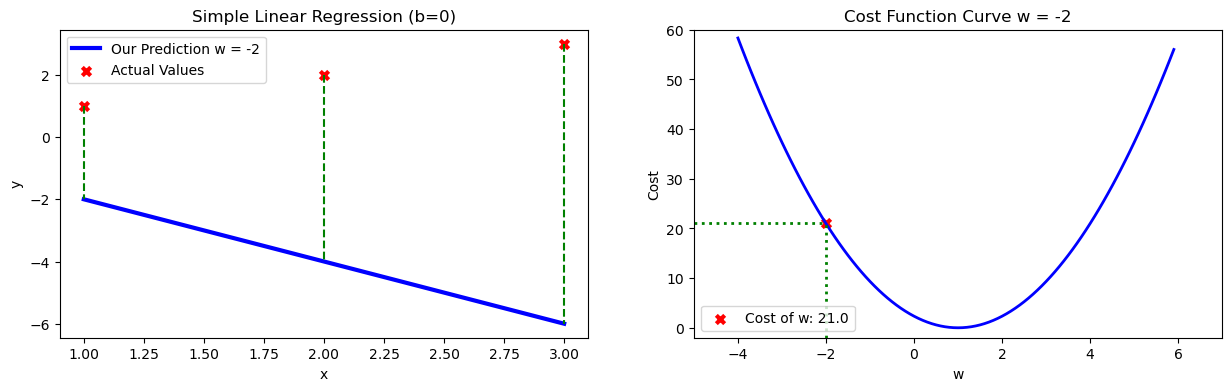

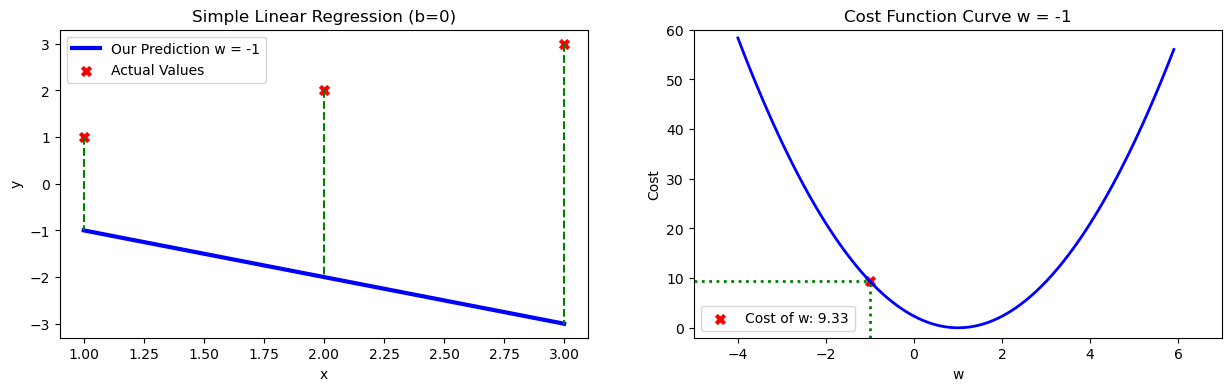

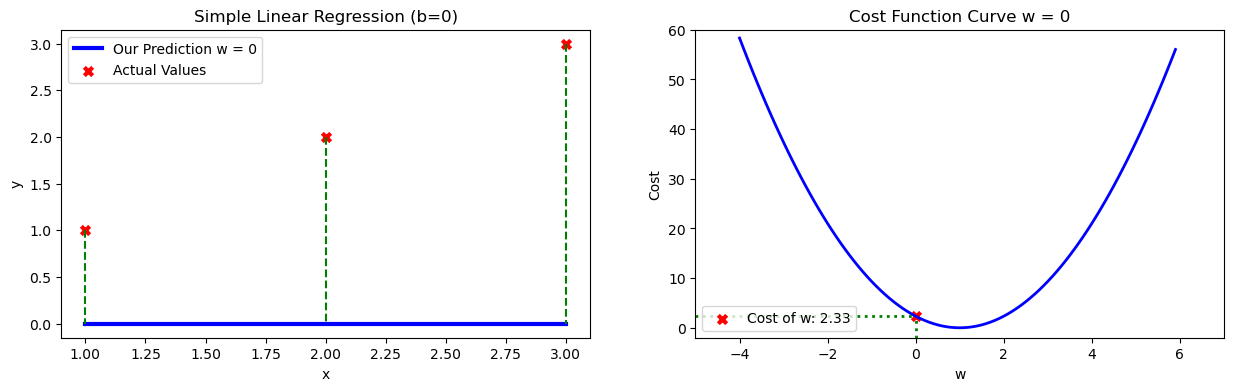

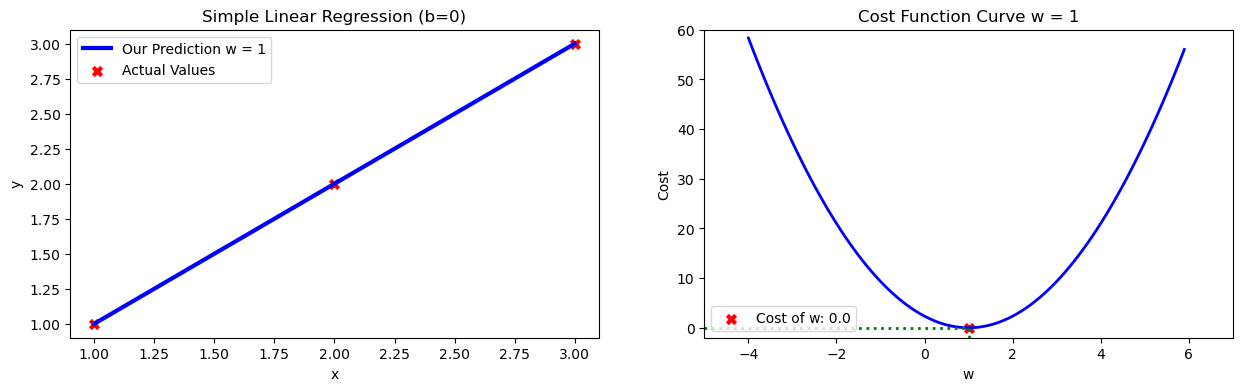

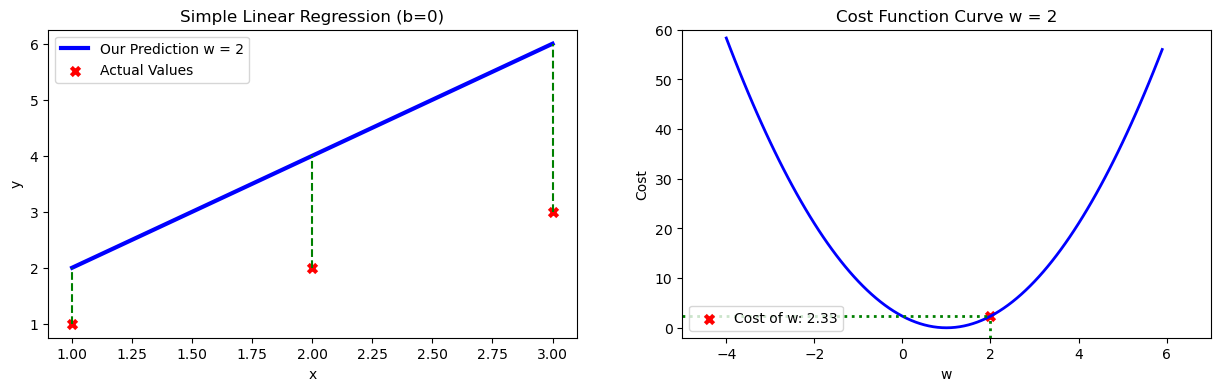

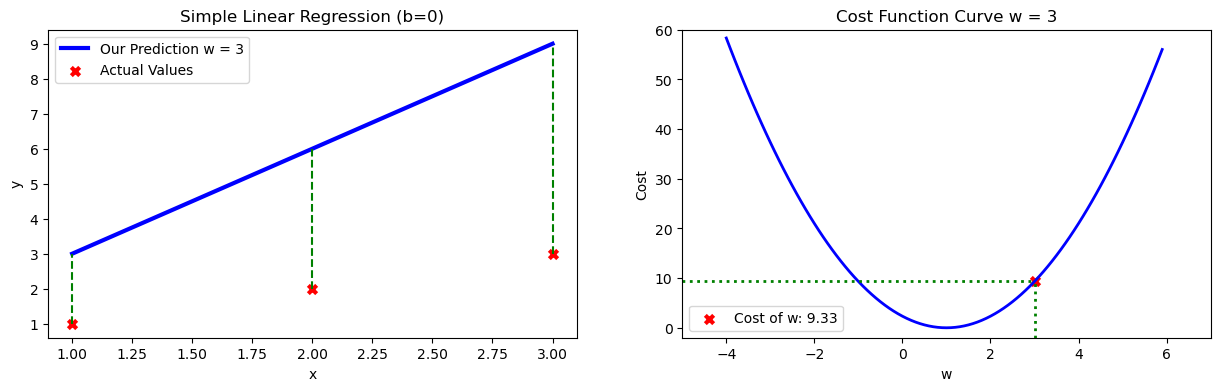

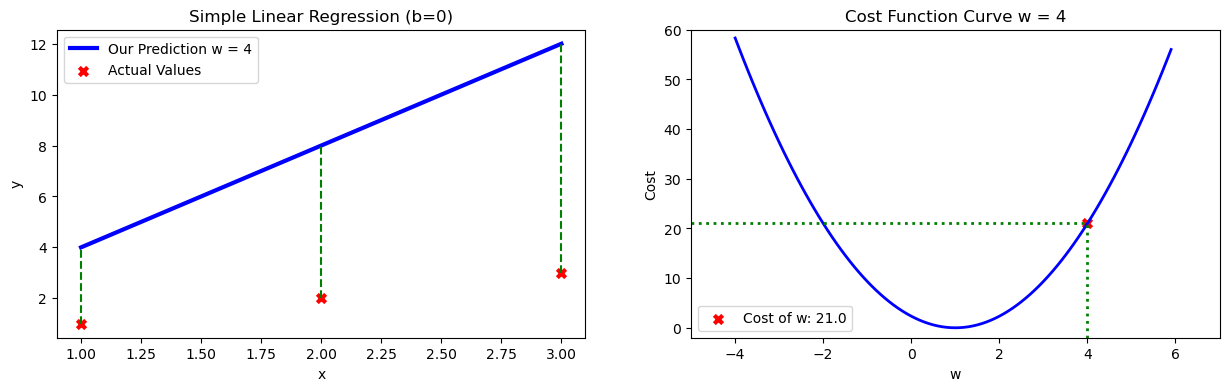

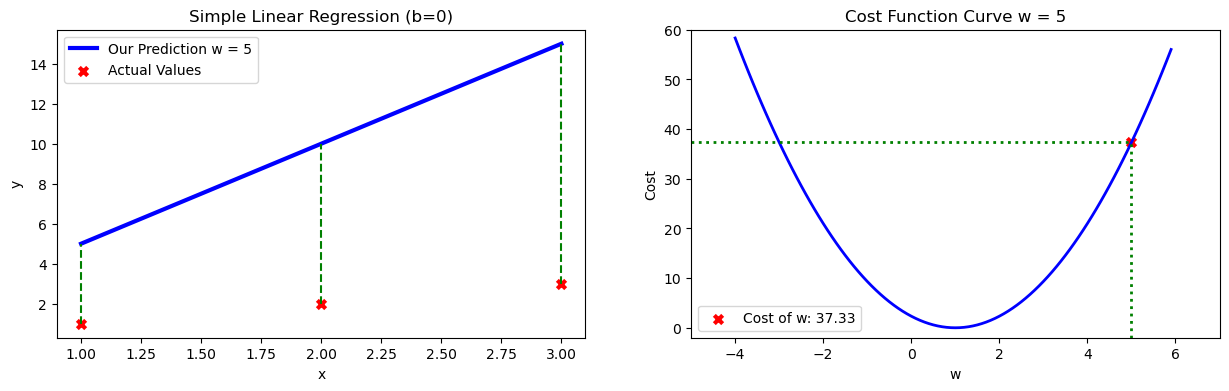

In [25]:
for w in range(-2,6,1):
    y_pre_a = compute_prediction_line_simple(x,w)

    w_range = np.arange(-4,6,0.1)
    costw = cost_function_simple(x,y,w_range)
    cost_w = cost_function_simple(x,y,w)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    # Plot our model prediction
    ax1.plot(x, y_pre_a, c='b',label='Our Prediction w = {}'.format(w), lw=3)

    # Plot actual data
    ax1.scatter(x, y, marker='x', c='r',label='Actual Values', lw=3)

    # Plot the distances of difference
    for i in range(len(x)):
        p1 = [x[i],y[i]]
        p2 = [x[i],y_pre_a[i]]
        ax1.plot(p1, p2, 'g--')



    # Set the title
    ax1.set_title("Simple Linear Regression (b=0)")
    # Set the y-axis label
    ax1.set_ylabel('y')
    # Set the x-axis label
    ax1.set_xlabel('x')
    ax1.legend()


    ax2.plot(w_range, costw, color='b', lw=2)
    ax2.scatter(w, cost_w, marker='x', c='r',label='Cost of w: {}'.format(round(cost_w,2)), lw=3)
    ax2.set_xlim(-5,7)
    ax2.set_ylim(-2,60)

    w_point = [w,cost_w]
    ax2p1 = [w,-2]
    ax2.vlines(w, ax2.get_ylim()[0], cost_w, color='g', linestyles='dotted', lw=2 )
    ax2.hlines(cost_w, ax2.get_xlim()[0],w, color='g', linestyles='dotted', lw=2 )

    ax2p2 = [-4,cost_w]
    wp = [w,cost_w]
    #ax2.plot(wp, ax2p2, 'g--')

    # Set the title
    ax2.set_title("Cost Function Curve w = {}".format(w))
    # Set the y-axis label
    ax2.set_ylabel('Cost')
    # Set the x-axis label
    ax2.set_xlabel('w')
    ax2.legend()

    plt.show()

## End of Note 4